<a href="https://colab.research.google.com/github/cybertraining-dsc/fa20-523-312/blob/master/toxicologyASV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A basic programming and data-analysis framework (*under updation*)**

The tasks below is carried out for the USGS data related to: *"USGS 03275500 EAST FORK WHITEWATER RIVER AT RICHMOND, IN"*.

Data was collected continuously from October 9, 2020 till October 16, 2020.

     Temperature  Sp. Conductance   pH  Dissolved O2
0           14.2              659  8.1           8.1
1           14.1              660  8.1           8.1
2           14.0              660  8.1           8.2
3           14.0              661  8.1           8.1
4           13.9              662  8.1           8.2
..           ...              ...  ...           ...
763         10.9              675  8.2           9.1
764         10.8              676  8.2           9.1
765         10.7              677  8.2           9.1
766         10.6              677  8.2           9.1
767         10.4              678  8.2           9.1

[768 rows x 4 columns]

Median Temperature value is: 15.2
Median Specific Conductance value is: 662.0
Median pH value is: 8.2
Median Dissolved-Oxygen value is: 8.4


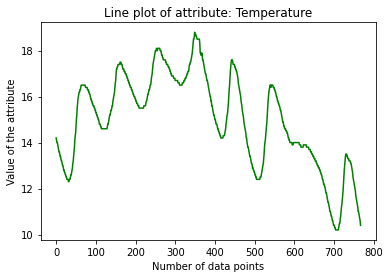

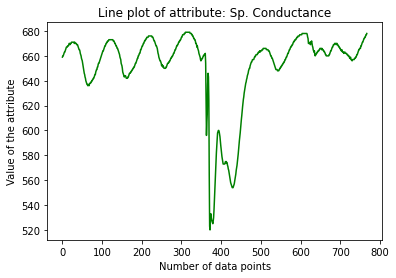

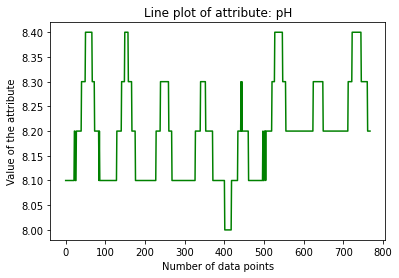

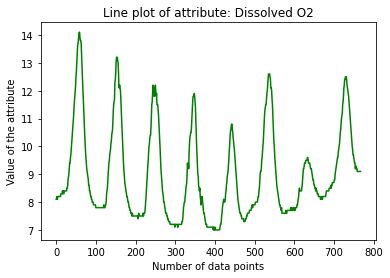

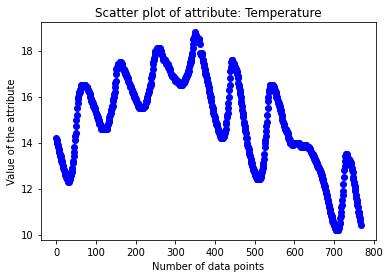

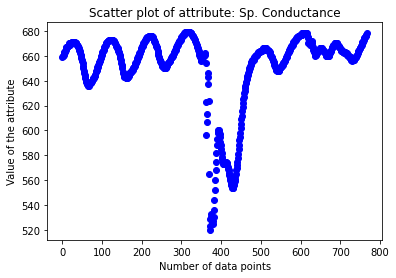

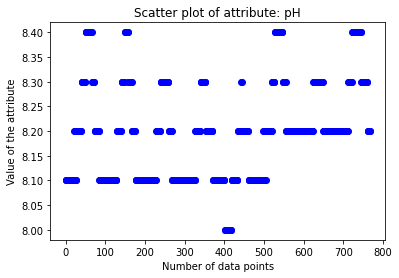

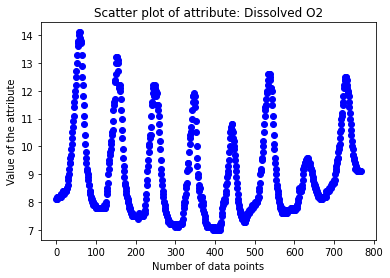

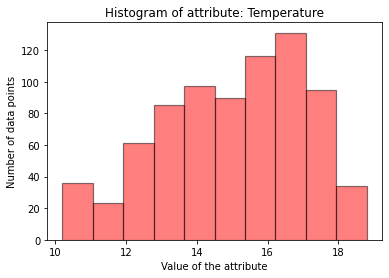

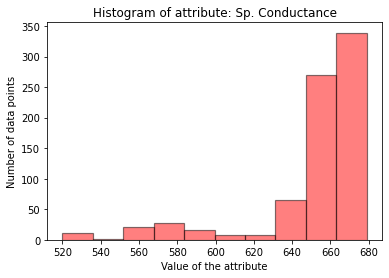

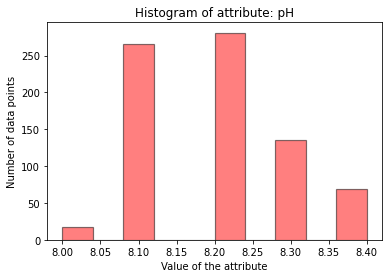

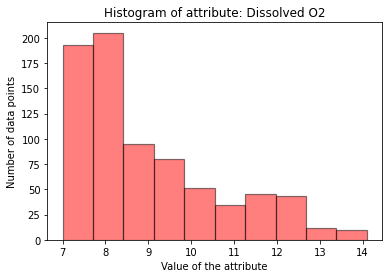

In [ ]:
#  Name: Saptarshi Sinha
#  Date: 11/01/2020
#  ENGR-E 534: Aquatic Toxicity Analysis with the aid of Autonomous Surface Vehicle (ASV)
#  Description: Implementation of a basic pythonic framework for analyzing the USGS and EPA databases
#  IMPORTANT INSTRUCTION: The following code assumes all applicable packages/libraries are pre-installed.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pandas import Series, DataFrame


def geturl(wlink, year, season):
    # this section will possibly be addressed in a later part
    # it will be showed how the various factors express dependency on each other
    pass


def download(url, filename):
   #NOTE: This section is not being currently used as data is only being read from an external website. It is not downloaded at all!
   #if filename already there:
   #    skip
   #else:
   #    download from url and store into filename
   pass


def test_fit(x, a, b):
    return a * np.sin(b * x)


def main():    
    # loading the USGS database as a panda data-frame
    df = pd.read_csv("https://waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00095=on&cb_00300=on&cb_00400=on&format=rdb&site_no=03275500&period=&begin_date=2020-10-09&end_date=2020-10-16", skiprows = 31, sep = "\t", header = None)
    #2019 full data from Richmond, IN: https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00010=on&cb_00095=on&cb_00300=on&cb_00400=on&format=rdb&site_no=03275500&period=&begin_date=2019-01-01&end_date=2019-12-31
    param_df = df[[4,6,8,10]]
    columns = ['Temperature', 'Sp. Conductance', 'pH', 'Dissolved O2']
    param_df.columns = columns
    print(param_df)
    print()
    
    # imputing missing values of a particular column 'x' with the mean of non-NaN values of the same column 
    ## mean_x = param_df["x"].mean()
    ## filled_df = param_df.fillna(mean_x)
    
    # running basic statistical operations
    temp_med = param_df["Temperature"].median()
    print("Median Temperature value is:", temp_med)
    cond_med = param_df["Sp. Conductance"].median()
    print("Median Specific Conductance value is:", cond_med)
    pH_med = param_df["pH"].median()
    print("Median pH value is:", pH_med)
    dissox_med = param_df["Dissolved O2"].median()
    print("Median Dissolved-Oxygen value is:", dissox_med)
    
    # plot separate histograms for each of the nine attributes
    #for j in columns:
    #  fig = plt.figure()
    #  sp = fig.add_subplot(1, 1, 1)
    #  sp.set_title("Histogram of attribute: " + str(j), fontsize = 12)
    #  sp.set_xlabel("Value of the attribute")
    #  sp.set_ylabel("Number of data points")
    #  sp.hist(param_df[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)

    x_data = list(range(0,768,1));
    y1_data = param_df["Temperature"];
    y2_data = param_df["Sp. Conductance"];
    y3_data = param_df["pH"];
    y4_data = param_df["Dissolved O2"];
    
    #def test_fit(x, a, b):
    #    return a * np.sin(b * x)
 
    #params, params_covariance = curve_fit(test_fit, x_data, y_data, p0=[2, 2])
    #print(params)
    params1, params_covariance = curve_fit(test_fit, x_data, y1_data)#, p1=[2, 2])
    params2, params_covariance = curve_fit(test_fit, x_data, y2_data)#, p2=[2, 2])
    params3, params_covariance = curve_fit(test_fit, x_data, y3_data)#, p3=[2, 2])
    params4, params_covariance = curve_fit(test_fit, x_data, y4_data)#, p4=[2, 2])
    
#    ans1 = (params1[0]*(np.sin(params1[1]*x_data)))
#    ans2 = (params2[0]*(np.sin(params2[1]*x_data))) 
#    ans3 = (params3[0]*(np.sin(params3[1]*x_data))) 
#    ans4 = (params4[0]*(np.sin(params4[1]*x_data))) 
    
#    plt.plot(x_data, y1_data, 'o', color ='red', label ="data") 
#    plt.plot(x_data, ans1, '--', color ='blue', label ="optimized data") 
#    plt.legend() 
#    plt.show()
#    
#    plt.plot(x_data, y2_data, 'o', color ='red', label ="data") 
#    plt.plot(x_data, ans2, '--', color ='blue', label ="optimized data") 
#    plt.legend() 
#    plt.show()
#    
#    plt.plot(x_data, y3_data, 'o', color ='red', label ="data") 
#    plt.plot(x_data, ans3, '--', color ='blue', label ="optimized data") 
#    plt.legend() 
#    plt.show()
#    
#    plt.plot(x_data, y4_data, 'o', color ='red', label ="data") 
#    plt.plot(x_data, ans4, '--', color ='blue', label ="optimized data") 
#    plt.legend() 
#    plt.show()

#    plt.scatter(x_data, y1_data, color = "red")
#    plt.scatter(x_data, y2_data, color = "blue")
#    plt.scatter(x_data, y3_data, color = "green")
#    plt.scatter(x_data, y4_data, color = "yellow")

    for j in columns:
      x_data = list(range(0,768,1));
      fig = plt.figure()
      sp = fig.add_subplot(1, 1, 1)
      sp.set_title("Line plot of attribute: " + str(j), fontsize = 12)
      sp.set_ylabel("Value of the attribute")
      sp.set_xlabel("Number of data points")
      sp.plot(x_data, param_df[j], color = "green", label='Data')
      #sp.scatter(x_data, param_df[j], color = "blue", label='Data')
      #sp.hist(param_df[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)
      
    for j in columns:
      x_data = list(range(0,768,1));
      fig = plt.figure()
      sp = fig.add_subplot(1, 1, 1)
      sp.set_title("Scatter plot of attribute: " + str(j), fontsize = 12)
      sp.set_ylabel("Value of the attribute")
      sp.set_xlabel("Number of data points")
      #sp.plot(x_data, param_df[j], color = "green", label='Data')
      sp.scatter(x_data, param_df[j], color = "blue", label='Data')
      #sp.hist(param_df[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)
      
    for j in columns:
      x_data = list(range(0,768,1));
      fig = plt.figure()
      sp = fig.add_subplot(1, 1, 1)
      sp.set_title("Histogram of attribute: " + str(j), fontsize = 12)
      sp.set_xlabel("Value of the attribute")
      sp.set_ylabel("Number of data points")
      #sp.plot(x_data, param_df[j], color = "green", label='Data')
      #sp.scatter(x_data, param_df[j], color = "blue", label='Data')
      sp.hist(param_df[j], bins = 10, color = "red", edgecolor='black', linewidth=1.2, alpha = 0.5)


if __name__ == "__main__": 
    main()
    
